In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('housing_data_with_new.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,year,month,renovated
0,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,98178,47.51120,-122.257,1340,5650,0,2014,10,0
1,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,98125,47.72100,-122.319,1690,7639,1,2014,12,1
2,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,1933,98028,47.75545,-122.233,2720,8062,0,2015,2,0
3,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,98136,47.52080,-122.393,1360,5000,1,2014,12,0
4,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,98074,47.61680,-122.045,1800,7503,0,2015,2,0


##### Split into Training & Test

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_y = df['price']
df_x = df.drop('price', axis = 1)

In [5]:
df_x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,year,month,renovated
0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,98178,47.51120,-122.257,1340,5650,0,2014,10,0
1,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,98125,47.72100,-122.319,1690,7639,1,2014,12,1
2,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,1933,98028,47.75545,-122.233,2720,8062,0,2015,2,0
3,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,98136,47.52080,-122.393,1360,5000,1,2014,12,0
4,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,98074,47.61680,-122.045,1800,7503,0,2015,2,0


In [6]:
train_x_org, test_x_org, train_y, test_y = train_test_split(df_x, df_y, random_state = 42)

scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x_org)
test_x = scaler.transform(test_x_org)

### Bagging

###### Linear Regression with Bagging

In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = {'n_estimators': [200,500], 
             'max_samples': [0.1, 0.2, 0.5],
             'max_features': [0.1, 0.3, 0.5]}

In [9]:
lreg = LinearRegression()
bag_lreg = BaggingRegressor(lreg, bootstrap = True, random_state = 42, oob_score = True)
bag_grid = GridSearchCV(bag_lreg, param_grid = param_grid, cv = 5, n_jobs = -1)
bag_grid.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.5],
                         'n_estimators': [200, 500]})

In [10]:
print('Best Cross Validation Score: {:.4f}'.format(bag_grid.best_score_))
print('Best Parameters: {}'.format(bag_grid.best_params_))

Best Cross Validation Score: 0.6458
Best Parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}


In [11]:
lreg = LinearRegression()
bag_lreg = BaggingRegressor(lreg, bootstrap = True, random_state = 42, oob_score = True,
                           max_features = 0.5, max_samples = 0.5, n_estimators = 500)
bag_lreg.fit(train_x, train_y)

print('Train Score: %.4f'% bag_lreg.score(train_x, train_y))
print('Test Score: %.4f'% bag_lreg.score(test_x, test_y))
print('Out-of-bag score: %.4f'%bag_lreg.oob_score_)

Train Score: 0.6448
Test Score: 0.6430
Out-of-bag score: 0.6437


###### Polynomial Regression with Bagging

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
param_grid = {'n_estimators': [200,500], 
             'max_samples': [0.1, 0.2, 0.5],
             'max_features': [0.1, 0.3, 0.5]}

In [14]:
poly = PolynomialFeatures(degree = 2)
poly_train_x = poly.fit_transform(train_x)
poly_test_x = poly.fit_transform(test_x)

poly_reg = LinearRegression()
bag_preg = BaggingRegressor(poly_reg, bootstrap = True, random_state = 42, oob_score = True)
bag_pgrid = GridSearchCV(bag_preg, param_grid = param_grid, cv = 5, n_jobs = -1)

bag_pgrid.fit(poly_train_x, train_y)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.5],
                         'n_estimators': [200, 500]})

In [15]:
print('Best Cross Validation Score: {:.4f}'.format(bag_grid.best_score_))
print('Best Parameters: {}'.format(bag_grid.best_params_))

Best Cross Validation Score: 0.6458
Best Parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}


In [16]:
poly_reg = LinearRegression()
bag_preg = BaggingRegressor(poly_reg, bootstrap = True, random_state = 42, oob_score = True, 
                            n_estimators = 500, max_samples = 0.5, max_features = 0.5)
bag_preg.fit(poly_train_x, train_y)

BaggingRegressor(base_estimator=LinearRegression(), max_features=0.5,
                 max_samples=0.5, n_estimators=500, oob_score=True,
                 random_state=42)

In [17]:
print("Train Score: %.4f"% bag_preg.score(poly_train_x, train_y))
print("Test Score: %.4f"% bag_preg.score(poly_test_x, test_y))

Train Score: 0.8140
Test Score: 0.7917


### Pasting

###### Linear Regression with Pasting

In [18]:
param_grid = {'n_estimators': [200,500], 
             'max_samples': [0.1, 0.2, 0.5],
             'max_features': [0.1, 0.3, 0.5]}

In [19]:
lreg = LinearRegression()
bag_lreg = BaggingRegressor(lreg, bootstrap = False, random_state = 42)
bag_grid = GridSearchCV(bag_lreg, param_grid = param_grid, cv = 5, n_jobs = -1)
bag_grid.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        bootstrap=False, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.5],
                         'n_estimators': [200, 500]})

In [20]:
print('Best Cross Validation Score: {:.4f}'.format(bag_grid.best_score_))
print('Best Parameters: {}'.format(bag_grid.best_params_))

Best Cross Validation Score: 0.6463
Best Parameters: {'max_features': 0.5, 'max_samples': 0.2, 'n_estimators': 500}


In [21]:
lreg = LinearRegression()
bag_lreg = BaggingRegressor(lreg, bootstrap = True, random_state = 42, oob_score = True,
                           max_features = 0.5, max_samples = 0.2, n_estimators = 500)
bag_lreg.fit(train_x, train_y)

print('Train Score: %.4f'% bag_lreg.score(train_x, train_y))
print('Test Score: %.4f'% bag_lreg.score(test_x, test_y))

Train Score: 0.6448
Test Score: 0.6429


###### Polynomial Regression with Pasting

In [22]:
param_grid = {'n_estimators': [200,500], 
             'max_samples': [0.1, 0.2, 0.5],
             'max_features': [0.1, 0.3, 0.5]}

In [23]:
poly = PolynomialFeatures(degree = 2)
poly_train_x = poly.fit_transform(train_x)
poly_test_x = poly.fit_transform(test_x)

poly_reg = LinearRegression()
bag_preg = BaggingRegressor(poly_reg, bootstrap = False, random_state = 42)
bag_pgrid = GridSearchCV(bag_preg, param_grid = param_grid, cv = 5, n_jobs = -1)

bag_pgrid.fit(poly_train_x, train_y)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        bootstrap=False, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.5],
                         'n_estimators': [200, 500]})

In [24]:
print('Best Cross Validation Score: {:.4f}'.format(bag_grid.best_score_))
print('Best Parameters: {}'.format(bag_grid.best_params_))

Best Cross Validation Score: 0.6463
Best Parameters: {'max_features': 0.5, 'max_samples': 0.2, 'n_estimators': 500}


In [25]:
poly_reg = LinearRegression()
bag_preg = BaggingRegressor(poly_reg, bootstrap = True, random_state = 42, oob_score = True, 
                            n_estimators = 500, max_samples = 0.2, max_features = 0.5)
bag_preg.fit(poly_train_x, train_y)

BaggingRegressor(base_estimator=LinearRegression(), max_features=0.5,
                 max_samples=0.2, n_estimators=500, oob_score=True,
                 random_state=42)

In [26]:
print("Train Score: %.4f"% bag_preg.score(poly_train_x, train_y))
print("Test Score: %.4f"% bag_preg.score(poly_test_x, test_y))

Train Score: 0.8132
Test Score: 0.7906


### Adaboost

###### Decision Tree Regression with Adaboost

In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

Text(0, 0.5, 'Score')

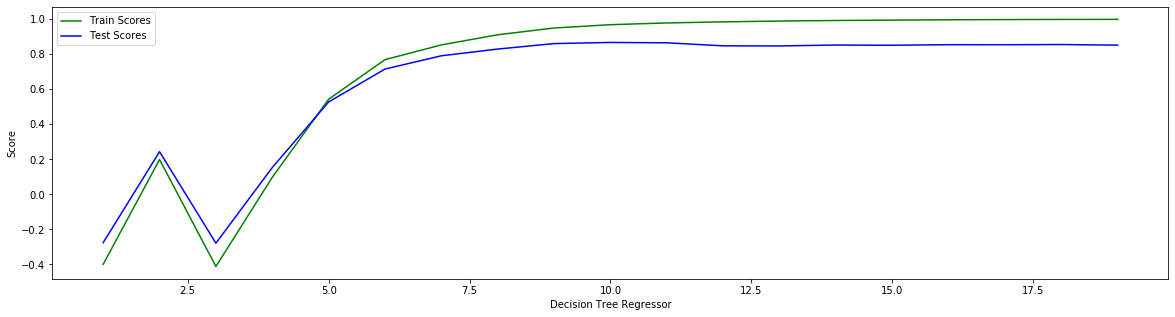

In [28]:
train_scores = []
test_scores = []
for k in range (1,20):
    dtreg = DecisionTreeRegressor(random_state = 42, max_depth = k)
    ada_dtreg = AdaBoostRegressor(dtreg, n_estimators = 500, random_state = 42)
    ada_dtreg.fit(train_x, train_y)
    train_scores.append(ada_dtreg.score(train_x, train_y))
    test_scores.append(ada_dtreg.score(test_x, test_y))
    
x_axis = range(1,20)
plt.subplots(figsize=(20,5))
plt.plot(x_axis, train_scores, c = 'g', label = 'Train Scores')
plt.plot(x_axis, test_scores, c = 'b', label = 'Test Scores')
plt.legend()
plt.xlabel('Decision Tree Regressor')
plt.ylabel('Score')
    

In [29]:
dtreg = DecisionTreeRegressor(random_state = 42, max_depth = 10)
ada_dtreg= AdaBoostRegressor(dtreg, n_estimators = 500, random_state = 42)

ada_dtreg.fit(train_x, train_y)
ada_dtreg.score(train_x, train_y)

print("Best max_depth = 10")
print("Train Score: %.4f"% ada_dtreg.score(train_x, train_y))
print("Test Score: %.4f"% ada_dtreg.score(test_x, test_y))

Best max_depth = 10
Train Score: 0.9684
Test Score: 0.8672


###### Polynomial Regression with Adaboost

In [30]:
param_grid = {'n_estimators': [100,200,300,500], 
             'learning_rate': [0.1, 0.3, 0.5, 0.7]}

In [31]:
poly = PolynomialFeatures(degree = 2)
poly_train_x = poly.fit_transform(train_x)
poly_test_x = poly.fit_transform(test_x)

poly_reg = LinearRegression()
ada_preg= AdaBoostRegressor(poly_reg, random_state = 42)
ada_grid = GridSearchCV(ada_preg, param_grid = param_grid, cv = 5, n_jobs = -1)
ada_grid.fit(poly_train_x, train_y)

print('Best Cross Validation Score: {:.4f}'.format(ada_grid.best_score_))
print('Best Parameters: {}'.format(ada_grid.best_params_))

Best Cross Validation Score: 0.6893
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [32]:
ada_preg = AdaBoostRegressor(LinearRegression(), random_state = 42, learning_rate = 0.1, n_estimators = 100)
ada_preg.fit(poly_train_x, train_y)

print("Train Score: %.4f"% ada_preg.score(poly_train_x, train_y))
print("Test Score: %.4f"% ada_preg.score(poly_test_x, test_y))

Train Score: 0.7236
Test Score: 0.6754


### Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
param_grid = {'n_estimators': [100,200,300,500], 
             'max_depth': [1, 3, 5, 7], 
             'learning_rate': [0.1, 0.3, 0.5, 0.7]}

gbrt = GradientBoostingRegressor(random_state = 42)
gbrt_grid = GridSearchCV(gbrt, param_grid = param_grid, cv = 5, n_jobs = -1)
gbrt_grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 500]})

In [35]:
print('Best Cross Validation Score: {:.4f}'.format(gbrt_grid.best_score_))
print('Best Parameters: {}'.format(gbrt_grid.best_params_))

Best Cross Validation Score: 0.8982
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [36]:
gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 500)
gbrt.fit(train_x, train_y)

print("Train Score: %.4f"% gbrt.score(train_x, train_y))
print("Test Score: %.4f"% gbrt.score(test_x, test_y))

Train Score: 0.9769
Test Score: 0.8836


### PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components = 0.98)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

pca.explained_variance_ratio_.sum()

0.9853112280999089

In [39]:
train_x_pca.shape

(16209, 13)

##### PCA - Linear Regression

In [40]:
pca_lreg = LinearRegression()
pca_lreg.fit(train_x_pca, train_y)

LinearRegression()

In [41]:
print('Train Score: %.4f'% pca_lreg.score(train_x_pca, train_y))
print('Test Score: %.4f'% pca_lreg.score(test_x_pca, test_y))

Train Score: 0.6383
Test Score: 0.6437


##### PCA - Polynomial Regression

In [42]:
poly = PolynomialFeatures(degree = 2)

poly_train_x_pca = poly.fit_transform(train_x_pca)
poly_test_x_pca = poly.transform(test_x_pca)

pca_poly_reg = LinearRegression()
pca_poly_reg.fit(poly_train_x_pca, train_y)

LinearRegression()

In [43]:
print("Train Score: %.4f"% pca_poly_reg.score(poly_train_x_pca, train_y))
print("Test Score: %.4f"% pca_poly_reg.score(poly_test_x_pca, test_y))

Train Score: 0.7759
Test Score: 0.7735


##### PCA - Ridge

In [44]:
from sklearn.linear_model import Ridge

In [45]:
train_score_list = []
test_score_list = []

x_range = [0.01, 0.1, 1, 10, 100]

for alpha in x_range:
    ridge = Ridge(alpha)
    ridge.fit(train_x_pca, train_y)
    train_score_list.append(ridge.score(train_x_pca, train_y))
    test_score_list.append(ridge.score(test_x_pca, test_y))
    
print("Train Scores: ",train_score_list, '\n',
      "Test Score: ", test_score_list)

Train Scores:  [0.6382501944123002, 0.6382501435036332, 0.6382451150920279, 0.6377975457657767, 0.6171069544549105] 
 Test Score:  [0.6437294915897294, 0.643717980778145, 0.6435993004481801, 0.6421016034425084, 0.6154294481846094]


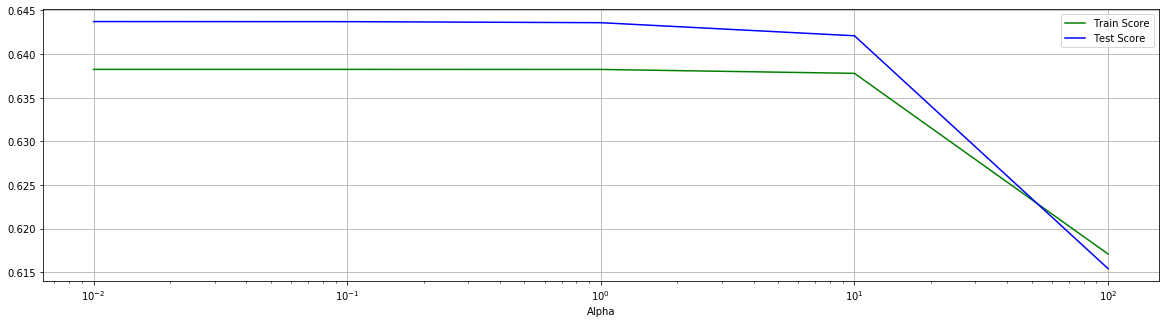

In [46]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('Alpha')
plt.grid()

In [47]:
ridge = Ridge(alpha = 0.01)
ridge.fit(train_x_pca, train_y)
print('Train score: {:.4f}'.format(ridge.score(train_x_pca, train_y)))
print('Test Score: {:.4f}'.format(ridge.score(test_x_pca, test_y)))

Train score: 0.6383
Test Score: 0.6437


##### PCA - Lasso

In [48]:
from sklearn.linear_model import Lasso

train_score_list = []
test_score_list = []

x_range = [0.01, 0.1, 1, 10, 100]

for alpha in x_range:
    lasso = Lasso(alpha)
    lasso.fit(train_x_pca, train_y)
    train_score_list.append(lasso.score(train_x_pca, train_y))
    test_score_list.append(lasso.score(test_x_pca, test_y))
    
print("Train Scores: ",train_score_list, '\n',
      "Test Score: ", test_score_list)

#alpha = 0.01 gave the best train and test score

Train Scores:  [0.6382501949266903, 0.638250194879304, 0.6382501901406692, 0.6382497162771914, 0.6382023299294103] 
 Test Score:  [0.6437307250976576, 0.6437303524318909, 0.6437266217537911, 0.6436889129295384, 0.643271620361493]


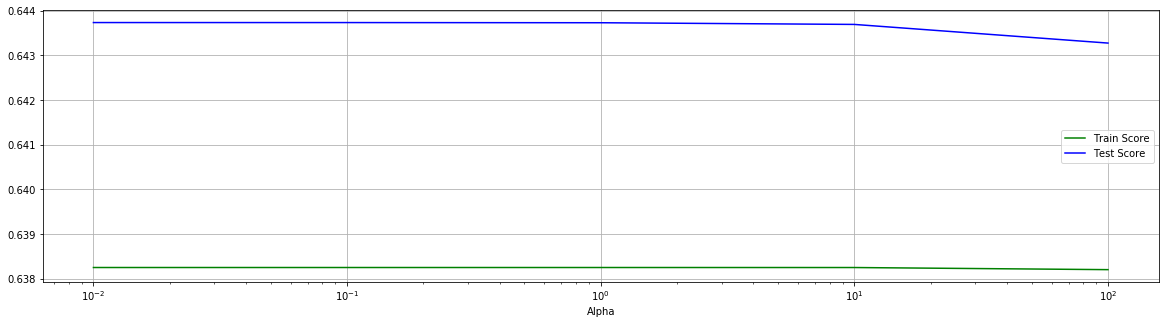

In [49]:
%matplotlib inline

plt.figure(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('Alpha')
plt.grid()

In [50]:
lasso = Lasso(alpha = 0.01)
lasso.fit(train_x_pca, train_y)
print('Train score: {:.4f}'.format(ridge.score(train_x_pca, train_y)))
print('Test Score: {:.4f}'.format(ridge.score(test_x_pca, test_y)))

Train score: 0.6383
Test Score: 0.6437


##### PCA - LinearSVR

In [51]:
from sklearn.svm import LinearSVR

In [52]:
from sklearn.svm import LinearSVR
train_score_list = []
test_score_list = []
x_range = [1, 10, 100, 1000, 10000,100000, 1000000, 10000000]

for i in x_range:
    regr = LinearSVR(C = i, random_state = 42)
    regr.fit(train_x_pca, train_y)
    train_score_list.append(regr.score(train_x_pca, train_y))
    test_score_list.append(regr.score(test_x_pca, test_y))

print("Train Scores: ", train_score_list)
print('\n')
print("Test Scores: ", test_score_list)

C:\Users\garyz\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Scores:  [-2.093151112428946, -1.1042825445286395, 0.028420318491161112, 0.4771708568453302, 0.5778176280970876, 0.589665394061764, 0.5900587796858787, 0.5882736579397252]


Test Scores:  [-1.890117180779587, -1.0118941330694788, 0.020621166666099255, 0.46315539324909494, 0.5694673347831112, 0.5826986960354524, 0.5832289881496269, 0.5814047237488124]


C:\Users\garyz\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


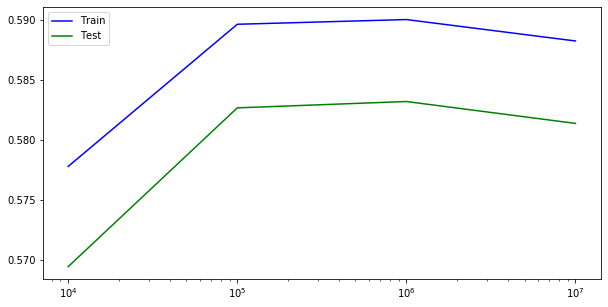

In [53]:
plt.figure(figsize = (10,5))
plt.plot(x_range[4:], train_score_list[4:], color = 'blue', label = 'Train')
plt.plot(x_range[4:], test_score_list[4:], color = 'green', label = 'Test')
plt.xscale('log')
plt.legend()

In [54]:
regr = LinearSVR(C = 1000000, random_state = 42)
regr.fit(train_x_pca, train_y)
print('Train score: {:.4f}'.format(regr.score(train_x_pca, train_y)))
print('Test score: {:.4f}'.format(regr.score(test_x_pca, test_y)))

Train score: 0.5901
Test score: 0.5832


C:\Users\garyz\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### PCA - SVR rbf

In [55]:
from sklearn.svm import SVR

In [56]:
param_grid = {'C': [10, 100, 1000, 10000, 1000000], 
             'gamma': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel = 'rbf'), param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(train_x_pca, train_y)

print('Best Cross Validation Score: {:.4f}'.format(grid_search.best_score_))
print('Best Parameters: {}'.format(grid_search.best_params_))

C:\Users\garyz\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Cross Validation Score: 0.7539
Best Parameters: {'C': 1000000, 'gamma': 1}


In [57]:
rbf_regr = SVR(C= 1000000, gamma=1, kernel = 'rbf')
rbf_regr.fit(train_x_pca, train_y)
print('Train score: {:.4f}'.format(rbf_regr.score(train_x_pca, train_y)))
print('Test score: {:.4f}'.format(rbf_regr.score(test_x_pca, test_y)))

Train score: 0.7978
Test score: 0.7714


##### PCA - SVR Linear

In [58]:
param_grid = {'C': [10, 100, 1000, 10000, 1000000], 
             'gamma': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel = 'linear'), param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(train_x_pca, train_y)

print('Best Cross Validation Score: {:.4f}'.format(grid_search.best_score_))
print('Best Parameters: {}'.format(grid_search.best_params_))

C:\Users\garyz\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Cross Validation Score: 0.5936
Best Parameters: {'C': 1000000, 'gamma': 0.01}


In [59]:
regr = SVR(C=1000000, gamma = 0.01, kernel ='linear')
regr.fit(train_x_pca, train_y)
print('Train score: {:.4f}'.format(regr.score(train_x_pca, train_y)))
print('Test score: {:.4f}'.format(regr.score(test_x_pca, test_y)))

Train score: 0.5904
Test score: 0.5835


##### PCA - SVR Polynomial

In [60]:
regr = SVR(C = 1000000, gamma = 1, kernel = 'poly', degree = 2)
regr.fit(train_x_pca, train_y)
print('Train score: {:.4f}'.format(regr.score(train_x_pca, train_y)))
print('Test score: {:.4f}'.format(regr.score(test_x_pca, test_y)))

Train score: 0.4870
Test score: 0.5055


##### PCA - KNN Regression

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(train_x_pca, train_y)
    train_score_array.append(knn_reg.score(train_x_pca, train_y))
    test_score_array.append(knn_reg.score(test_x_pca, test_y))
    
print(train_score_array, '\n', test_score_array)

[0.9999998930659681, 0.8996332907289654, 0.8515045352601978, 0.8260225321161554, 0.804836899302562, 0.788992430880952, 0.7751229587849342, 0.7650134674321374, 0.7550640646111865, 0.7467217550117191, 0.7397192846451275, 0.7330620382504305, 0.7281109407283972, 0.7222778041836886, 0.7171095585745264, 0.712420041144997, 0.7063510007050195, 0.7015732024003201, 0.6972251228289135] 
 [0.6117297896932699, 0.6632027692065399, 0.6757481422938127, 0.6876356175857326, 0.6885378894175067, 0.6936714039949479, 0.6916267554586912, 0.6859545829831166, 0.6798676511333996, 0.6774796180020242, 0.6790412458413696, 0.6773380782482606, 0.673477070294753, 0.670117360943987, 0.6650618001206872, 0.6619955556388908, 0.6585401230598682, 0.6542393377265046, 0.652196735153673]


Text(0, 0.5, 'Score')

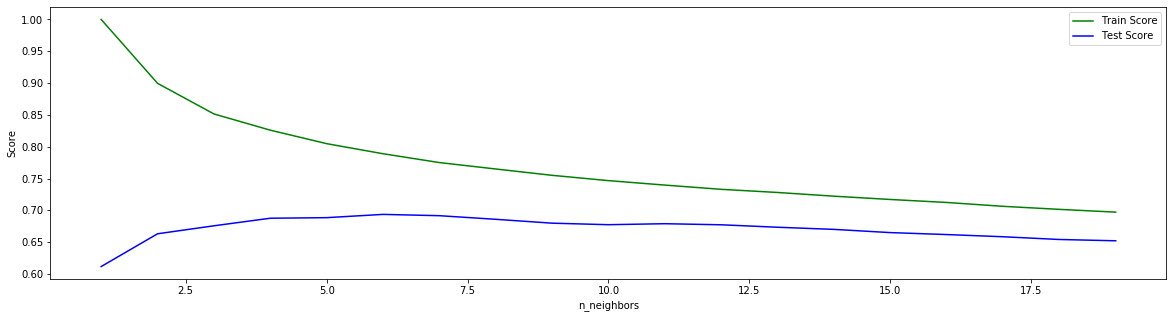

In [63]:
x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Score')

In [64]:
knn_reg = KNeighborsRegressor(6)
knn_reg.fit(train_x_pca, train_y)
print('Best n_neighbors value is 6')
print('Train score: {:.4f}'.format(knn_reg.score(train_x_pca, train_y)))
print('Test score: {:.4f}'.format(knn_reg.score(test_x_pca, test_y)))

Best n_neighbors value is 6
Train score: 0.7890
Test score: 0.6937


##### PCA - Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1, 20): 
    regr = DecisionTreeRegressor(random_state = 42, min_samples_leaf = k)
    regr.fit(train_x_pca, train_y)
    train_score_array.append(regr.score(train_x_pca, train_y))
    test_score_array.append(regr.score(test_x_pca, test_y))
    
print(train_score_array, '\n', test_score_array)

[0.9999999463405028, 0.9674443504589989, 0.9399950077925211, 0.9114624224716474, 0.8883566417830383, 0.8740966060284412, 0.8544724667204592, 0.8443972985153866, 0.8316684065054611, 0.8210671322056994, 0.8068287252082553, 0.7973930033279295, 0.79198843099696, 0.7864810123977426, 0.7786679805201978, 0.7747969495306691, 0.7711052826859603, 0.7624769915222546, 0.7602303847463923] 
 [0.6378038838075033, 0.6428454879445951, 0.6615094108427091, 0.6512275325519726, 0.6351789787124282, 0.6404608826507019, 0.6332310941879641, 0.6330623744387949, 0.6467896310412484, 0.645458036011906, 0.6553424311488996, 0.6639523831878847, 0.6653278700947832, 0.6617750370388413, 0.665124257585685, 0.6638127345834519, 0.6588175176492391, 0.6473341843525369, 0.6456584916622712]


Text(0, 0.5, 'Score')

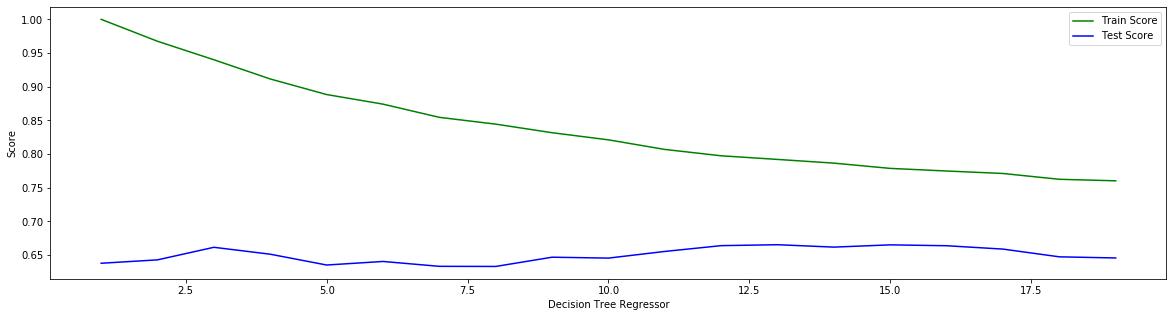

In [67]:
x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Decision Tree Regressor')
plt.ylabel('Score')

In [68]:
regr = DecisionTreeRegressor(random_state = 42, min_samples_leaf = 13)
regr.fit(train_x_pca, train_y)

print('Best min_samples_leaf = 13')
print('Train score: ',round(regr.score(train_x_pca, train_y),4))
print('Test score: ',round(regr.score(test_x_pca, test_y),4))

Best min_samples_leaf = 13
Train score:  0.792
Test score:  0.6653


PCA sped up the models, but overall, due to the feature reductions, the accuracy of the models were reduced. Comparing all models after PCA, we see that similar as in Project 1, the best model was SVM with rbf kernel

###### Deep Learning Models

In [69]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

In [70]:
modelr = Sequential()
#Input Layer
modelr.add(Dense(19, input_dim = train_x.shape[1], 
                 activation = 'relu', 
                 name = 'input_layer'))
#Hidden Layer
modelr.add(Dense(19, activation = 'relu', name = 'hidden_layer1'))
modelr.add(Dense(19, activation = 'relu', name = 'hidden_layer2'))
#Output Layer
modelr.add(Dense(1, name = 'output_layer'))

In [71]:
modelr.compile(loss = 'mse', optimizer = 'adam')
modelr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 19)                380       
_________________________________________________________________
hidden_layer1 (Dense)        (None, 19)                380       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 19)                380       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 20        
Total params: 1,160
Trainable params: 1,160
Non-trainable params: 0
_________________________________________________________________


In [83]:
modelr.fit(train_x, train_y, epochs = 500, batch_size = 64, verbose = 0)

###### Visual Comparison between SVM-rbf and ANN predictions

In [73]:
print('Train MSE: ',round(modelr.evaluate(train_x, train_y, verbose = 0),4))
print('Test MSE: ',round(modelr.evaluate(test_x, test_y, verbose = 0),4))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Train MSE:  25514229760.0
Test MSE:  30122072064.0


In [74]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

In [75]:
print('ANN Train R-Square Score: ',round(r2_score(train_y, modelr.predict(train_x)),4))
print('ANN Test R-Square Score: ',round(r2_score(test_y, modelr.predict(test_x))),4)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
ANN Train R-Square Score:  0.8035
ANN Test R-Square Score:  1.0 4


### Model Comparison: ANN vs Decision Tree Regression with Adaboost

Since best model based on R2 score was the Decision Tree Regression with Adaboost. We will compare it with ANN to determine the best model.

###### MSE and Explained Variance Score comparisons

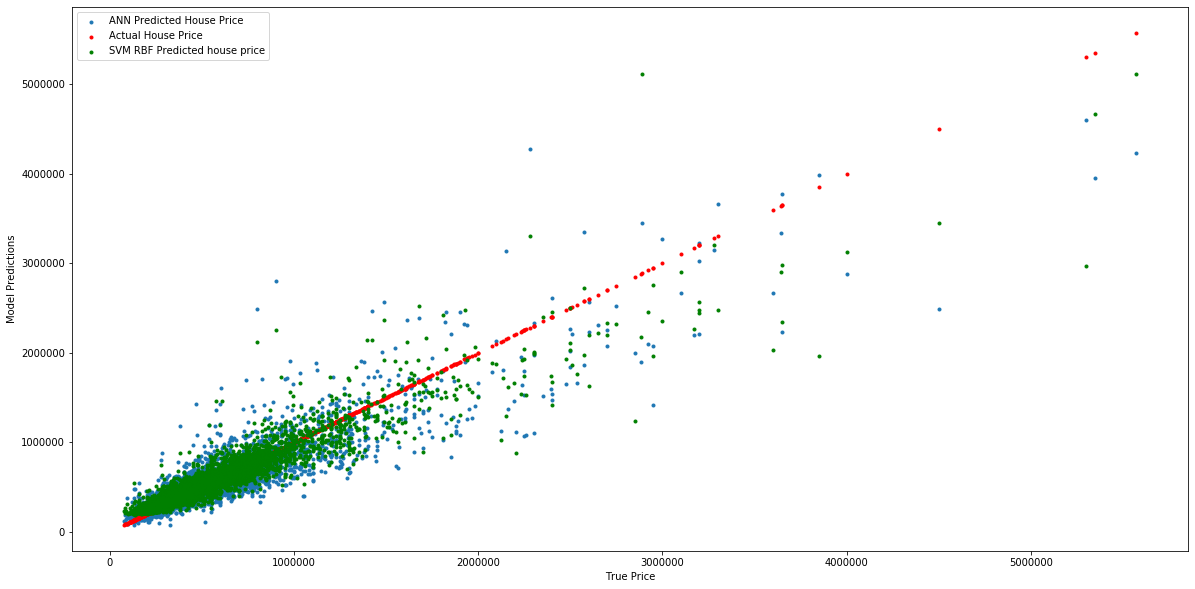

In [76]:
plt.figure(figsize = (20,10))
plt.scatter(test_y, modelr.predict(test_x), marker = '.', label = 'ANN Predicted House Price')
plt.scatter(test_y, test_y, color = 'red', marker = '.', label = 'Actual House Price')
plt.scatter(test_y, ada_dtreg.predict(test_x), color = 'green', marker = '.', label = 'SVM RBF Predicted house price')
plt.xlabel('True Price')
plt.ylabel('Model Predictions')
plt.legend()

In [77]:
adadt_MSE_train = round(mean_squared_error(train_y, ada_dtreg.predict(train_x)),4)
adadt_MSE_test = round(mean_squared_error(test_y, ada_dtreg.predict(test_x)),4)
adadt_exp_train = round(explained_variance_score(train_y, ada_dtreg.predict(train_x)),4)
adadt_exp_test = round(explained_variance_score(test_y, ada_dtreg.predict(test_x)),4)

print('Train MSE for Decision Tree model with Adaboost: ', adadt_MSE_train)
print('Test MSE for Decision Tree model with Adaboost: ', adadt_MSE_test)
print('Train Explained Variance Score for Decision Tree model with Adaboost: ', adadt_exp_train)
print('Test Explained Variance Score for Decision Tree model with Adaboost: ', adadt_exp_test)

Train MSE for Decision Tree model with Adaboost:  4100640099.725
Test MSE for Decision Tree model with Adaboost:  19870006194.6959
Train Explained Variance Score for Decision Tree model with Adaboost:  0.9702
Test Explained Variance Score for Decision Tree model with Adaboost:  0.8677


In [78]:
ann_MSE_train = round(modelr.evaluate(train_x, train_y, verbose = 0),4)
ann_MSE_test = round(modelr.evaluate(test_x, test_y, verbose = 0),4)
ann_exp_train = round(explained_variance_score(train_y, modelr.predict(train_x)),4)
ann_exp_test = round(explained_variance_score(test_y, modelr.predict(test_x)),4)

print('Train MSE for ANN model: ', ann_MSE_train)
print('Test MSE for ANN model: ', ann_MSE_test)
print('Train Explained Variance Score for ANN model: ', ann_exp_train)
print('Test Explained Variance Score for ANN model: ', ann_exp_test)

Train MSE for ANN model:  25514229760.0
Test MSE for ANN model:  30122072064.0
Train Explained Variance Score for ANN model:  0.8038
Test Explained Variance Score for ANN model:  0.7992


# Final Model - Decision Tree with Adaboost

Based on the MSE and explained variance scores, we can see that Decision Tree model with Adaboost generated the best model in each metric.

In [79]:
dtreg = DecisionTreeRegressor(random_state = 42, max_depth = 10)
ada_dtreg= AdaBoostRegressor(dtreg, n_estimators = 500, random_state = 42)

ada_dtreg.fit(train_x, train_y)
ada_dtreg.score(train_x, train_y)

print("Best max_depth = 10")
print("Train Score: %.4f"% ada_dtreg.score(train_x, train_y))
print("Test Score: %.4f"% ada_dtreg.score(test_x, test_y))

Best max_depth = 10
Train Score: 0.9684
Test Score: 0.8672


###### Plot actual price versus predicted price

In [80]:
adadt_MSE_train = round(mean_squared_error(train_y, ada_dtreg.predict(train_x)),4)
adadt_MSE_test = round(mean_squared_error(test_y, ada_dtreg.predict(test_x)),4)
adadt_exp_train = round(explained_variance_score(train_y, ada_dtreg.predict(train_x)),4)
adadt_exp_test = round(explained_variance_score(test_y, ada_dtreg.predict(test_x)),4)

print('Train MSE for Decision Tree model with Adaboost: ', adadt_MSE_train)
print('Test MSE for Decision Tree model with Adaboost: ', adadt_MSE_test)
print('Train Explained Variance Score for Decision Tree model with Adaboost: ', adadt_exp_train)
print('Test Explained Variance Score for Decision Tree model with Adaboost: ', adadt_exp_test)

Train MSE for Decision Tree model with Adaboost:  4100640099.725
Test MSE for Decision Tree model with Adaboost:  19870006194.6959
Train Explained Variance Score for Decision Tree model with Adaboost:  0.9702
Test Explained Variance Score for Decision Tree model with Adaboost:  0.8677


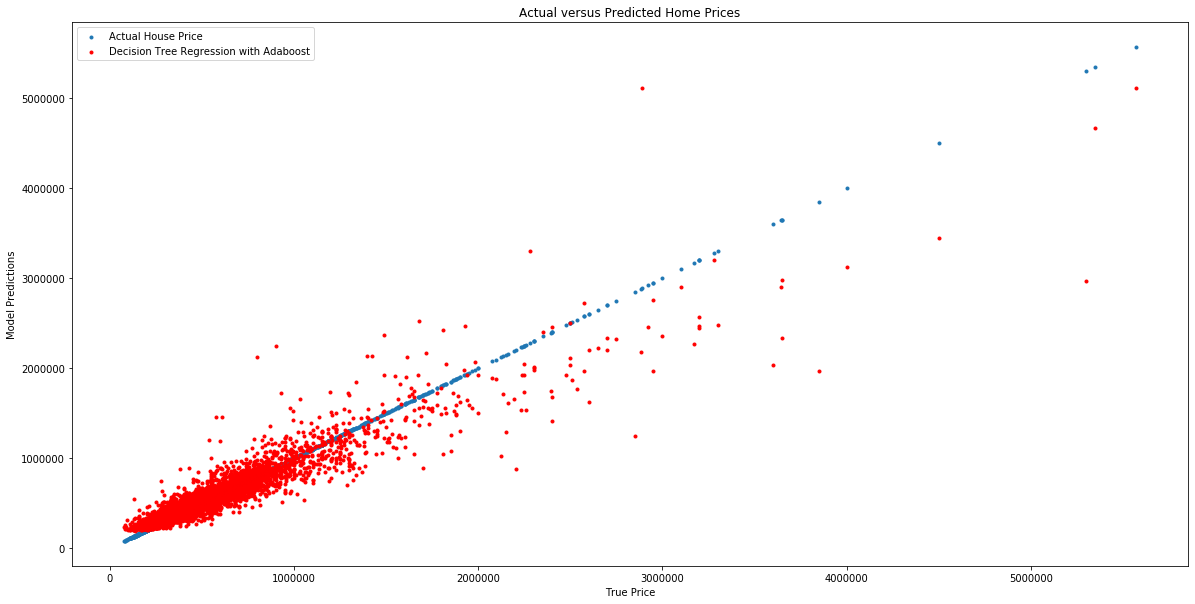

In [81]:
plt.figure(figsize = (20,10))
plt.scatter(test_y, test_y, marker = '.', label = 'Actual House Price')
plt.scatter(test_y, ada_dtreg.predict(test_x), color = 'red', marker = '.', label = 'Decision Tree Regression with Adaboost')
plt.xlabel('True Price')
plt.ylabel('Model Predictions')
plt.title('Actual versus Predicted Home Prices')
plt.legend()